In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import glob


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
def analyze_condition_effect(df, column_name=None, exclude_combinations=None, plot_base_name=None):
    """
    Perform a hierarchical linear model analysis and create a boxplot, optionally saving plots.

    Parameters:
    df (pd.DataFrame): DataFrame containing columns ['sub', 'day', 'condition'] and numeric columns.
    column_name (str, None, or 'all'): 
        - If None, computes the mean across numeric columns (excluding ['sub', 'day', 'condition']).
        - If a string column name is given, analyzes the specified column.
        - If 'all', analyzes all numeric columns individually and returns a dictionary of p-values.
    exclude_combinations (list of tuples): 
        - List of (sub, day, condition) tuples to be excluded from the analysis.
    plot_base_name (str or None):
        - Base name for saving plots. If None, plots are displayed but not saved.

    Returns:
    float or dict: 
        - If a single column or None is provided, returns the p-value.
        - If 'all' is provided, returns a dictionary with column names as keys and p-values as values.
    """
    # Ensure correct data types
    df['sub'] = df['sub'].astype(str)
    df['day'] = df['day'].astype(str)
    df['condition'] = df['condition'].astype(str)

    # Apply exclusion criteria if provided
    if exclude_combinations:
        df = df[~df.set_index(['sub', 'day', 'condition']).index.isin(exclude_combinations)]

    # Identify numeric columns (exclude non-numeric ones)
    numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in ['sub', 'day', 'condition']]

    if column_name is None:
        # Compute mean across numeric columns
        df['average'] = df[numeric_columns].mean(axis=1)
        analysis_columns = ['average']
    elif column_name == 'all':
        # Analyze all numeric columns individually
        analysis_columns = numeric_columns
    else:
        # Analyze only the specified column
        if column_name in df.columns and pd.api.types.is_numeric_dtype(df[column_name]):
            analysis_columns = [column_name]
        else:
            raise ValueError(f"Column '{column_name}' is either missing or not numeric.")

    p_values = {}

    for col in analysis_columns:
        # Drop rows with NaN values in the column
        df_clean = df[['sub', 'condition', col]].dropna()

        # ----- HIERARCHICAL LINEAR MODEL -----
        try:
            model = smf.mixedlm(f"{col} ~ condition", df_clean, groups=df_clean["sub"], re_formula="~1")
            result = model.fit()
            p_value = result.pvalues.get("condition[T.mindfulness]", None)  # Get p-value for the condition effect
            p_values[col] = p_value
        except Exception as e:
            print(f"Skipping column '{col}' due to model fitting error: {e}")
            continue

        # ----- PLOT: Boxplot with Individual Points -----
        plt.figure(figsize=(8, 6))
        sns.boxplot(x="condition", y=col, data=df_clean, width=0.5, showfliers=False, boxprops=dict(alpha=0.6))
        sns.stripplot(x="condition", y=col, data=df_clean, jitter=True, alpha=0.6, color='black')

        # Add p-value text if available
        if p_value is not None:
            plt.text(0.5, df_clean[col].max(), f'p = {p_value:.4f}', ha='center', fontsize=12)

        # Labels
        plt.xlabel("Condition")
        plt.ylabel("Response" if column_name else "Average Response")
        title_suffix = f"for {col}" if column_name else "of All Channels"
        plt.title(f"Comparison of Jhana vs Mindfulness {title_suffix}")

        # Save or show the plot
        if plot_base_name:
            plot_filename = f"plots/{plot_base_name}_{col}.png"
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            print(f"Plot saved as: {plot_filename}")
        else:
            plt.show()

    return p_values if column_name == 'all' else p_values.get(analysis_columns[0], None)


In [ ]:

exclusions = [('sub2', 'day1', 'mindfulness'), 
              ('sub4', 'day4', 'mindfulness'), 
              ('sub6', 'day1', 'mindfulness'), 
              ('sub7', 'day2', 'mindfulness'), 
              ('sub8', 'day2', 'mindfulness'), 
              ('sub9', 'day1', 'mindfulness'), 
              ('sub9', 'day4', 'jhana'), 
]

In [57]:
path = '../output/AVC/AVC_bin_2.0_iei_0.008.csv'
df = pd.read_csv(path)


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warn

Plot saved as: plots/AVC_mean_iei.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_tau.png
Plot saved as: plots/AVC_tau_dist_TR.png
Plot saved as: plots/AVC_alpha.png
Plot saved as: plots/AVC_alpha_dist_TR.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_third.png
Plot saved as: plots/AVC_dcc_cn.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_avl_br.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_br.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_rep_dissimilarity_avg.png
Plot saved as: plots/AVC_rep_size.png
Plot saved as: plots/AVC_fano.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_chi_test.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_chi_notest.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1557: RuntimeWarning: divide by zero encountered in log
  likeval -= (self.n_totobs - self.k_fe) * np.log(qf) / 2.
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1797: RuntimeWarning: invalid value encountered in true_divide
  score_re += 0.5 * fac * rva

Plot saved as: plots/AVC_sig_length.png
Plot saved as: plots/AVC_len_avls.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_data_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/AVC_data_std.png


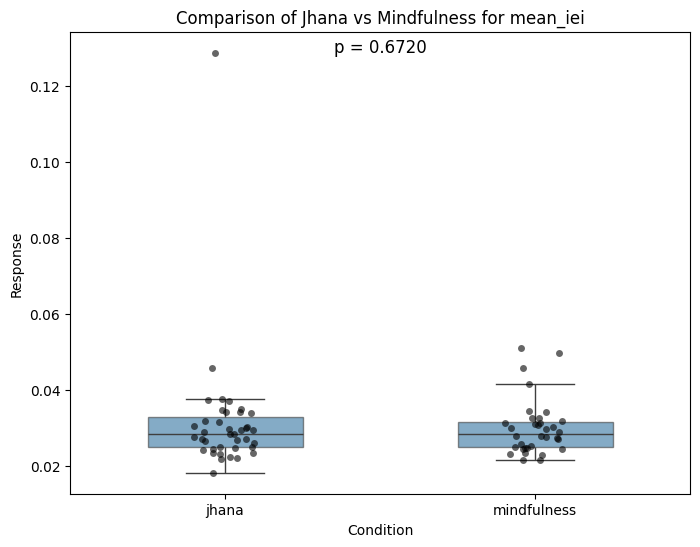

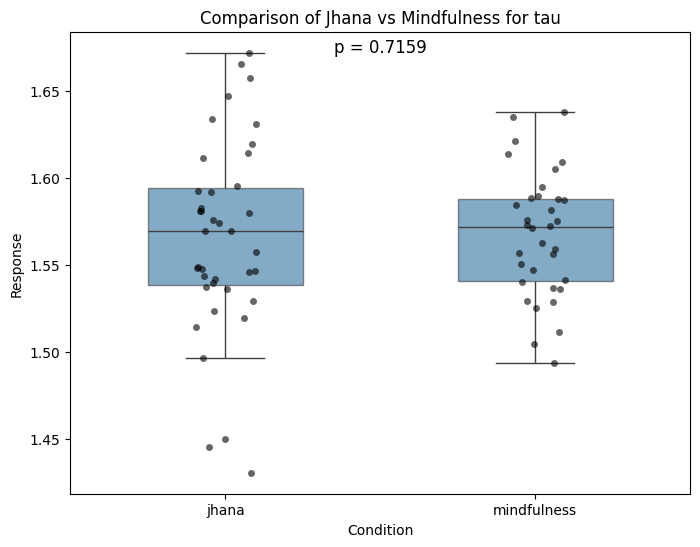

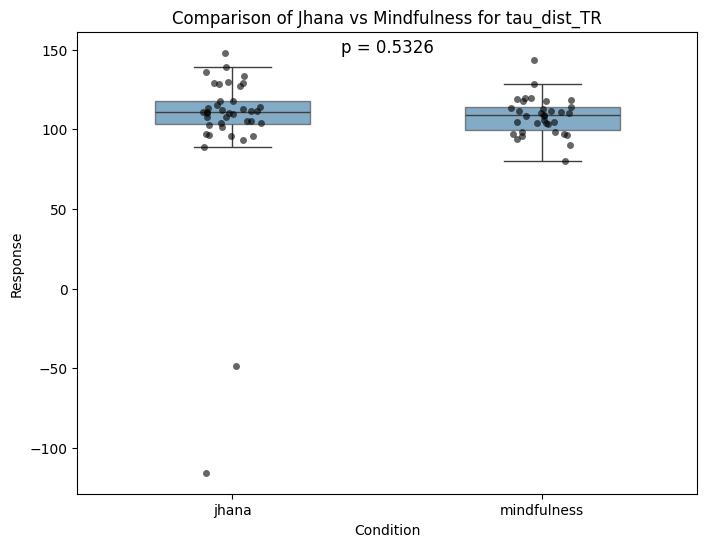

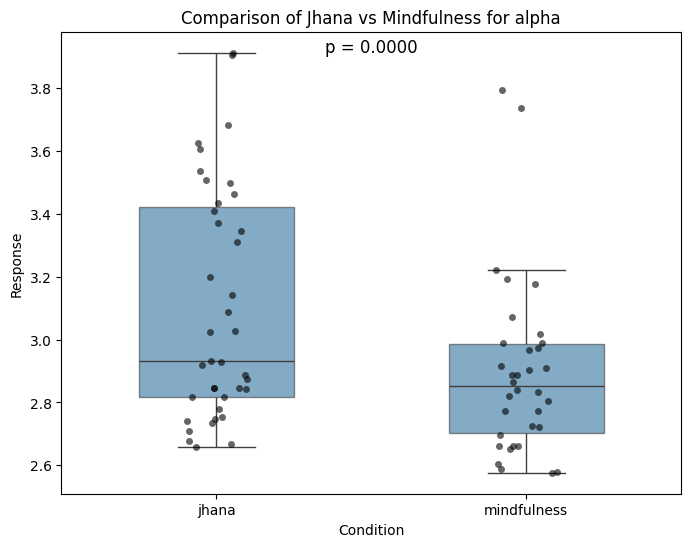

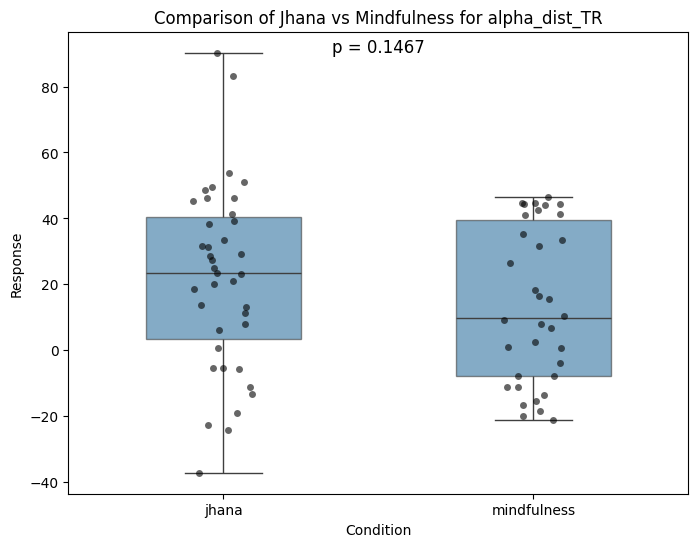

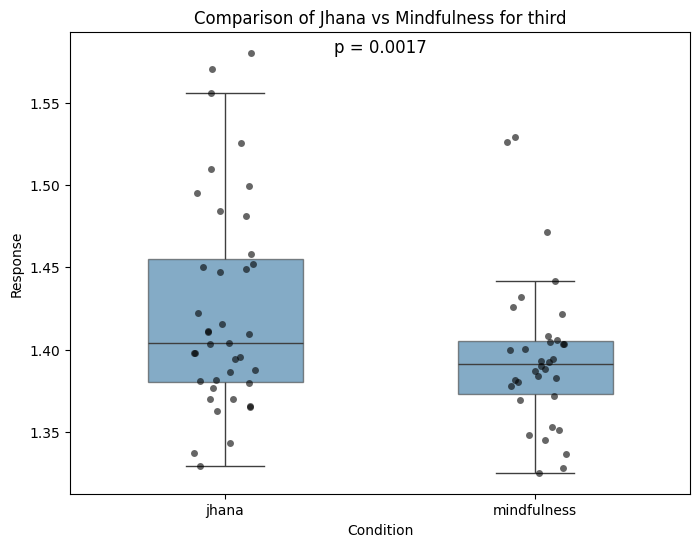

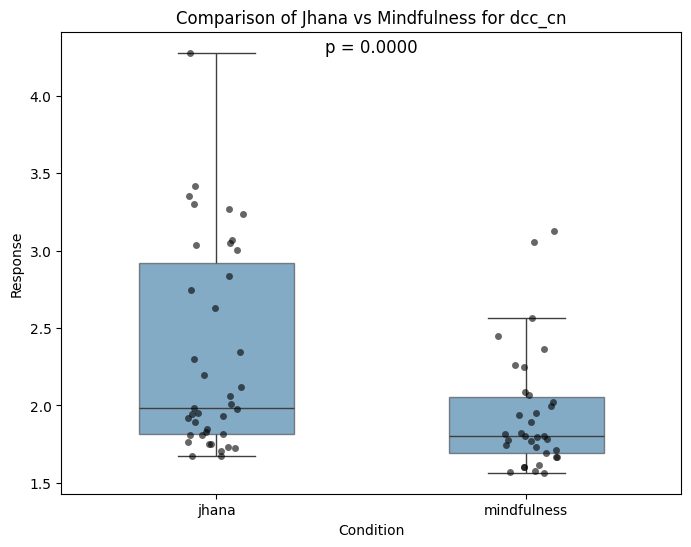

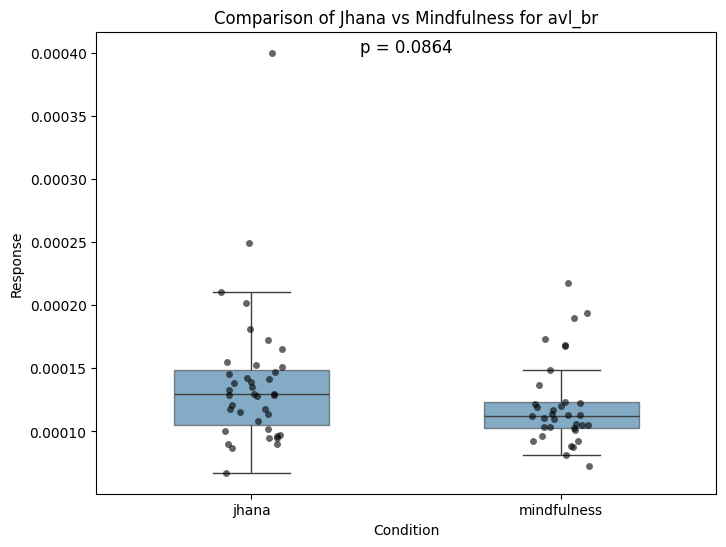

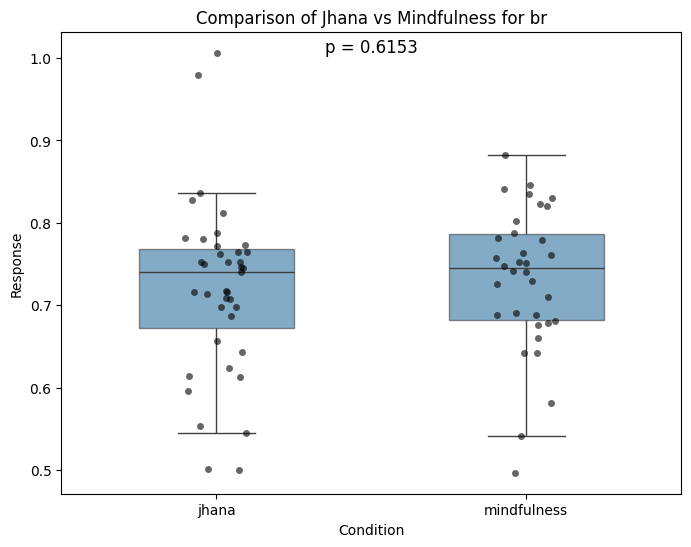

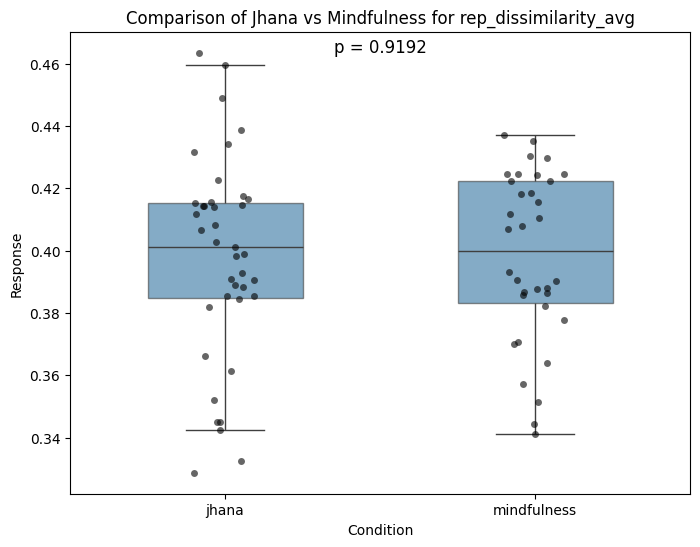

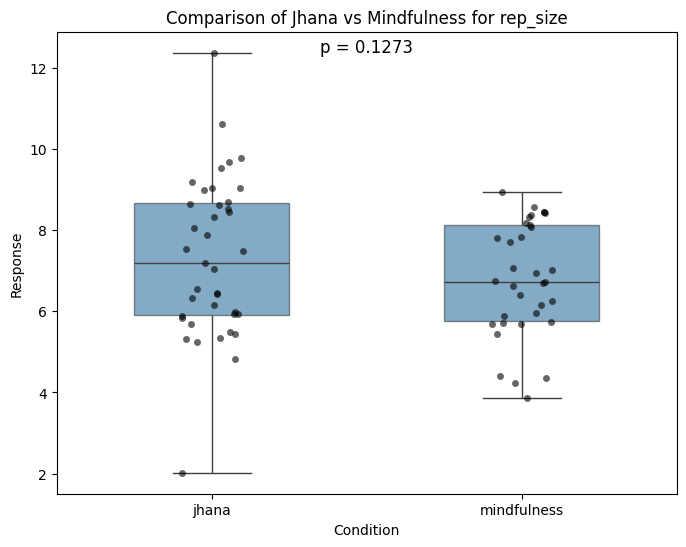

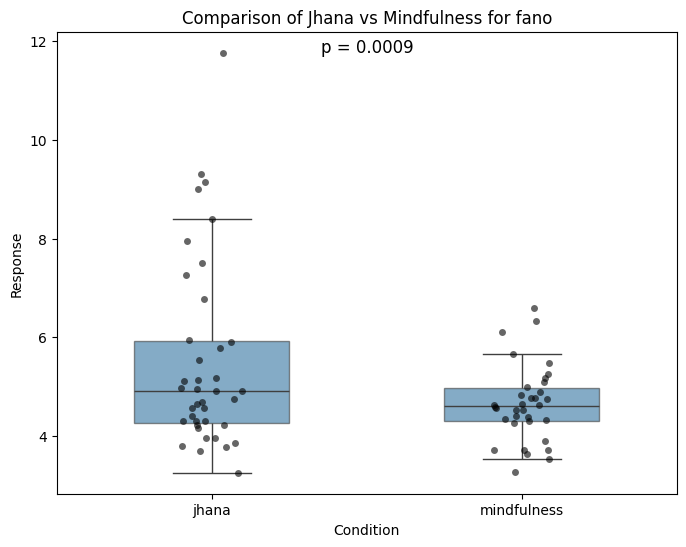

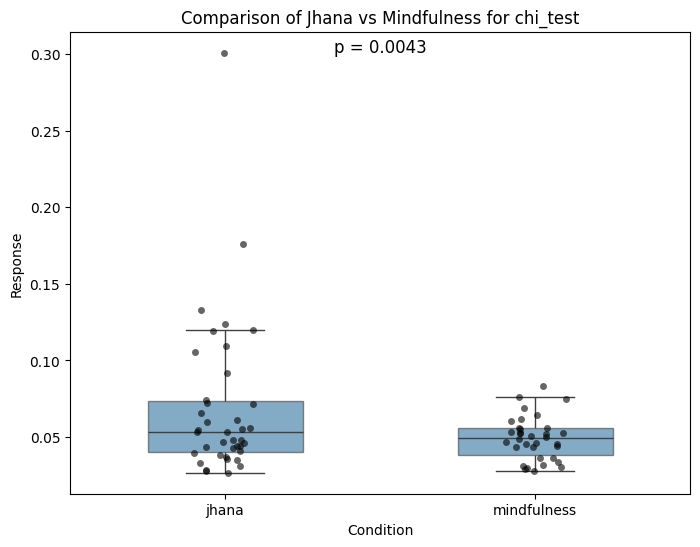

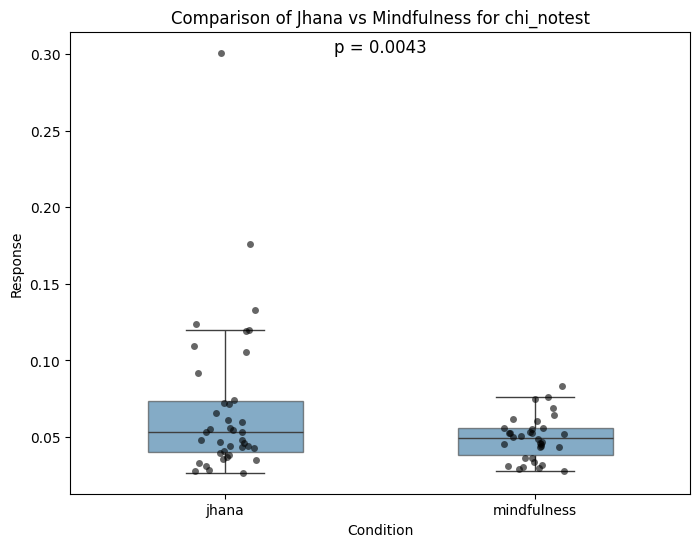

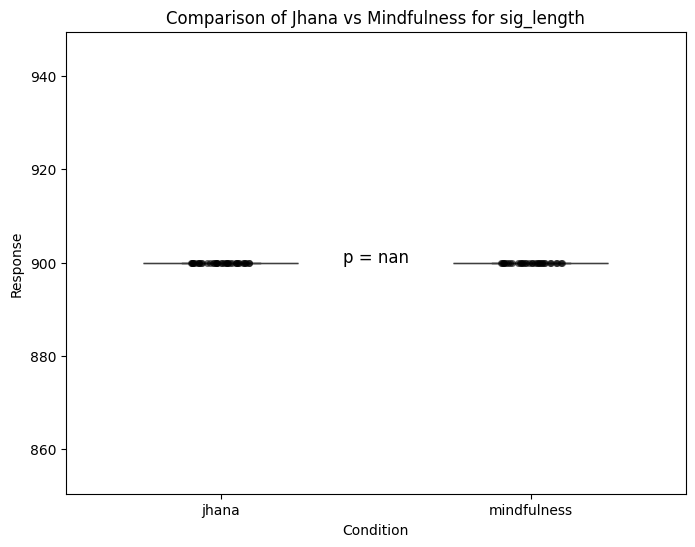

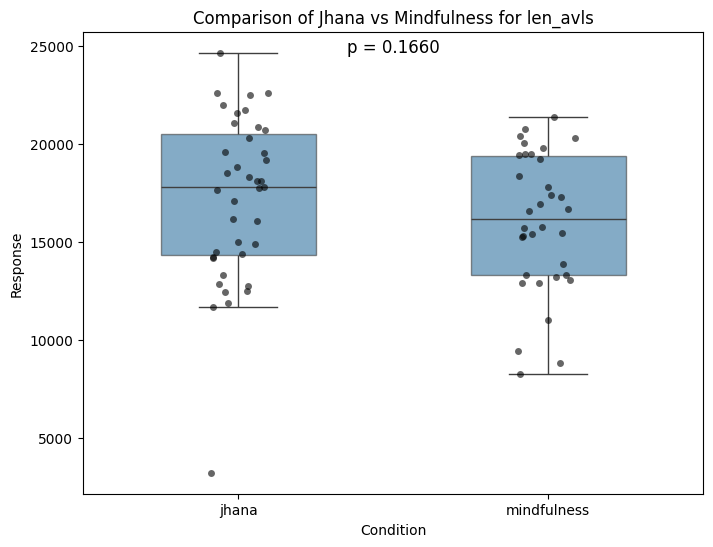

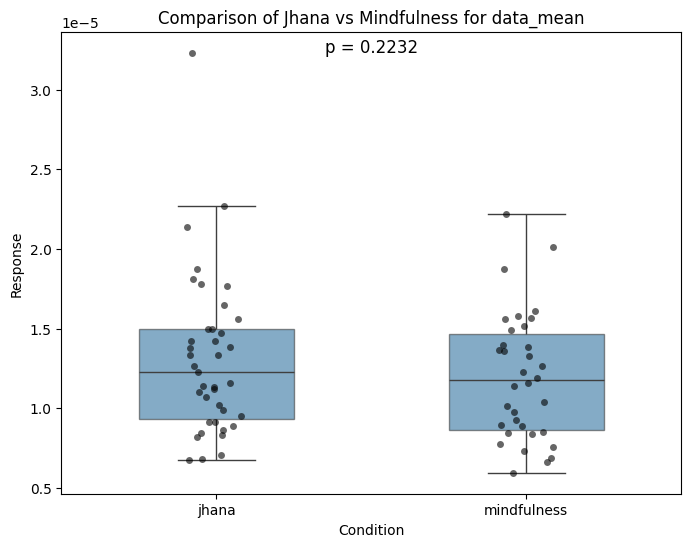

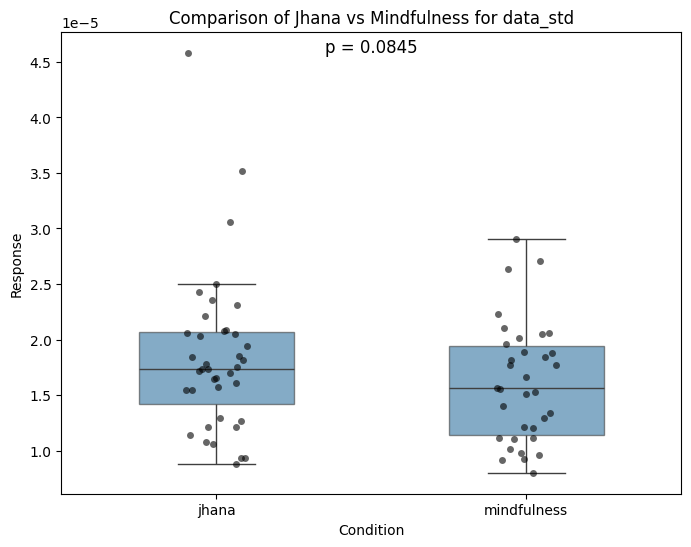

In [58]:
## Avalanches
path = '../output/AVC/AVC_bin_2.0_iei_0.008.csv'
df = pd.read_csv(path)

p_val_filtered = analyze_condition_effect(
    df, 
    column_name='all', 
    exclude_combinations=exclusions, 
    plot_base_name='AVC'
)

/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_1_4_HURST_FH.png
Plot saved as: plots/DFA_1_4_HURST_DFA.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_1_45_HURST_FH.png
Plot saved as: plots/DFA_1_45_HURST_DFA.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_4_8_HURST_FH.png
Plot saved as: plots/DFA_4_8_HURST_DFA.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_8_13_HURST_FH.png
Plot saved as: plots/DFA_8_13_HURST_DFA.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_13_30_HURST_FH.png
Plot saved as: plots/DFA_13_30_HURST_DFA.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/DFA_30_44_HURST_FH.png
Plot saved as: plots/DFA_30_44_HURST_DFA.png


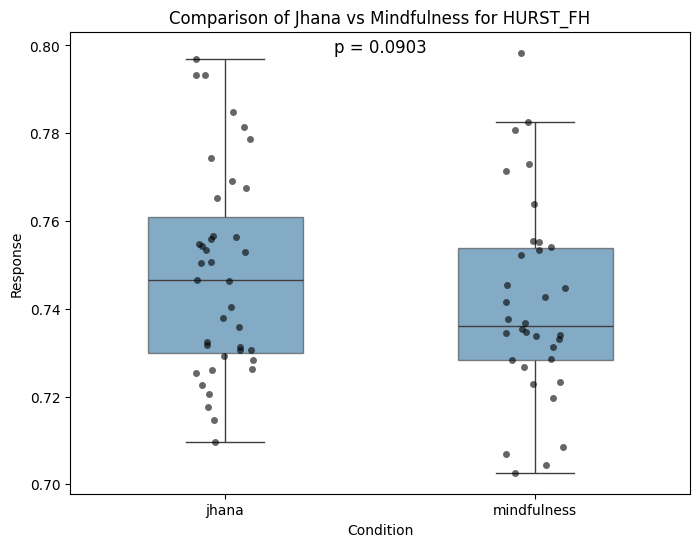

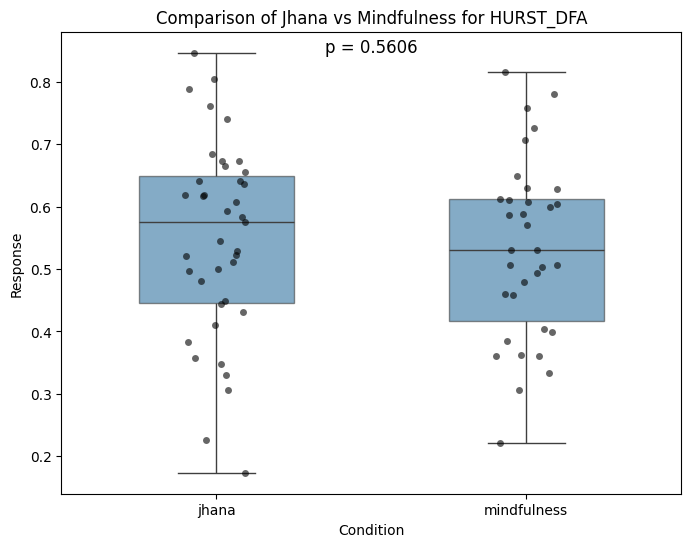

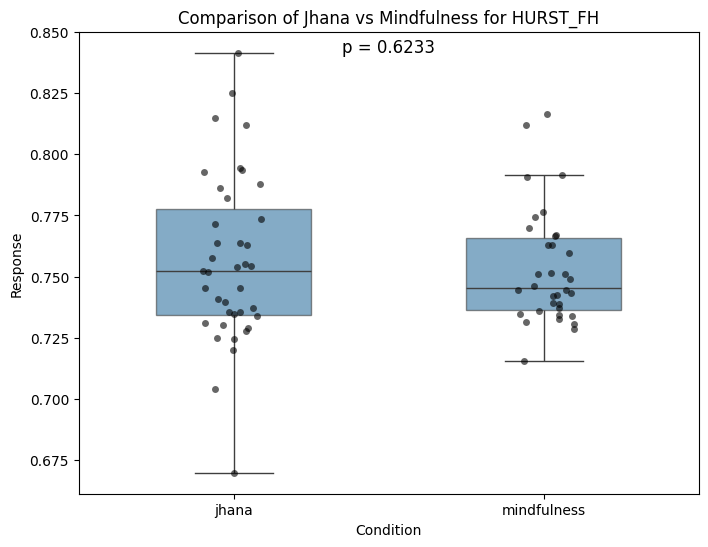

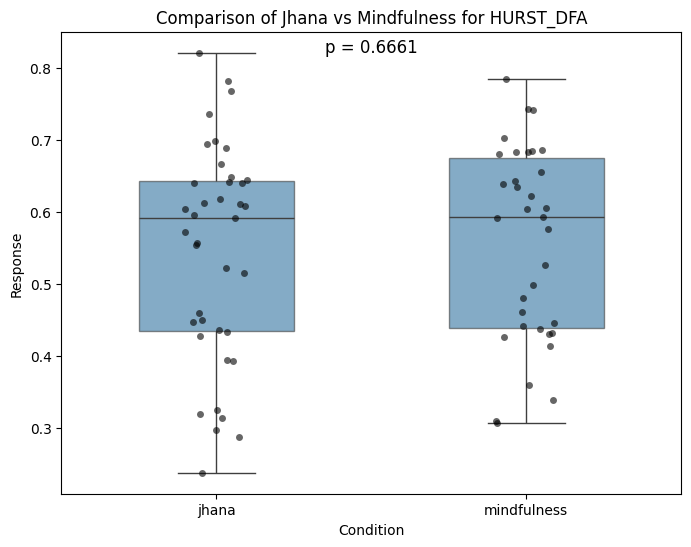

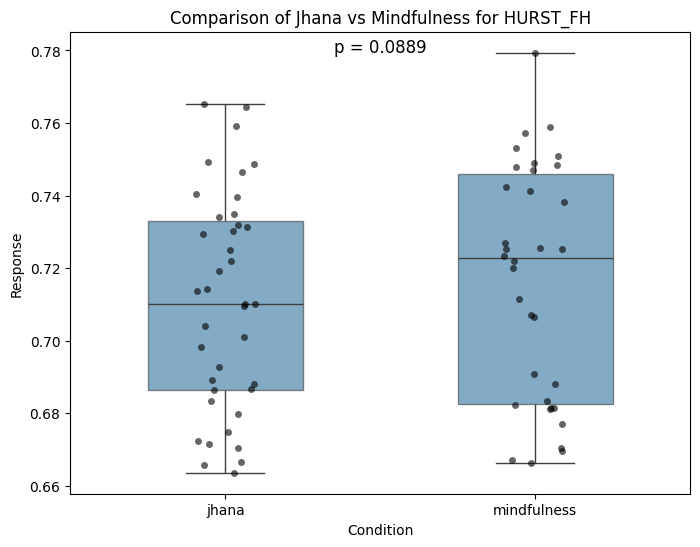

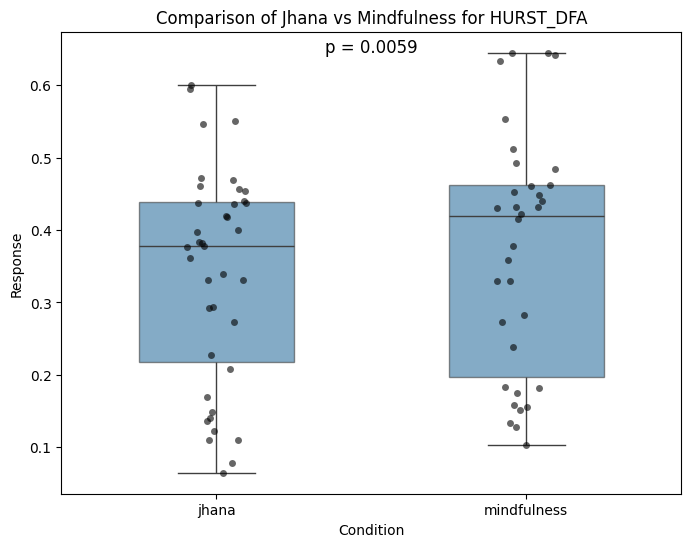

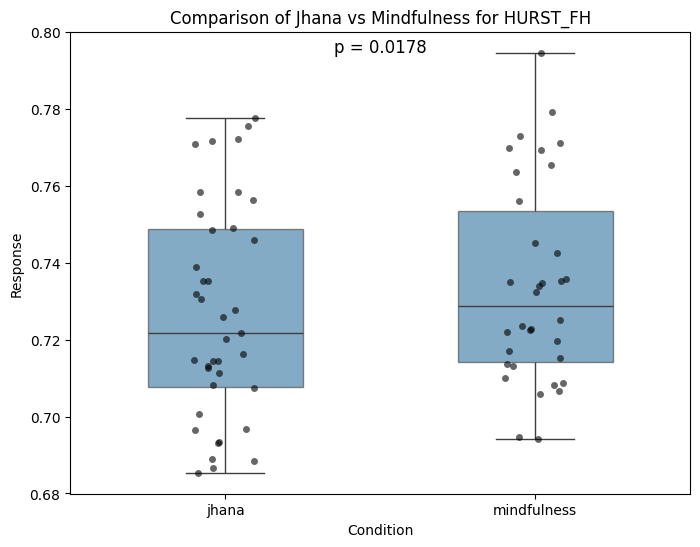

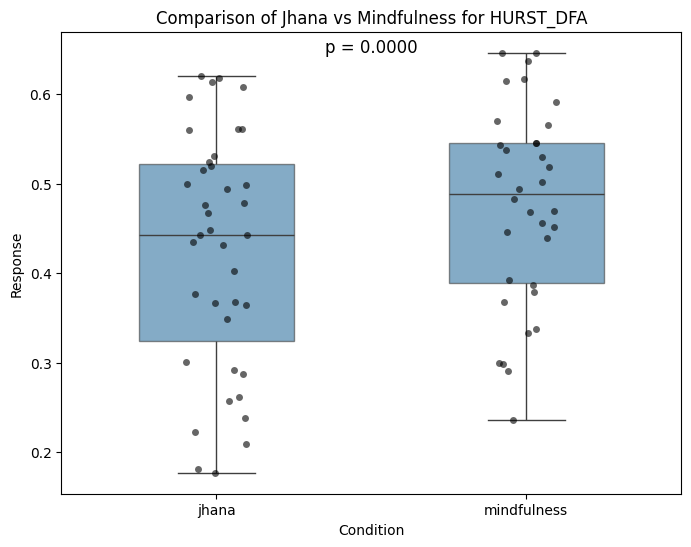

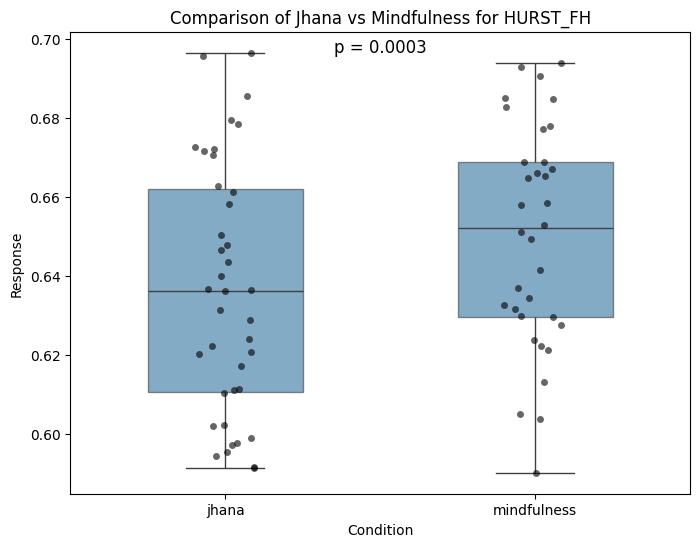

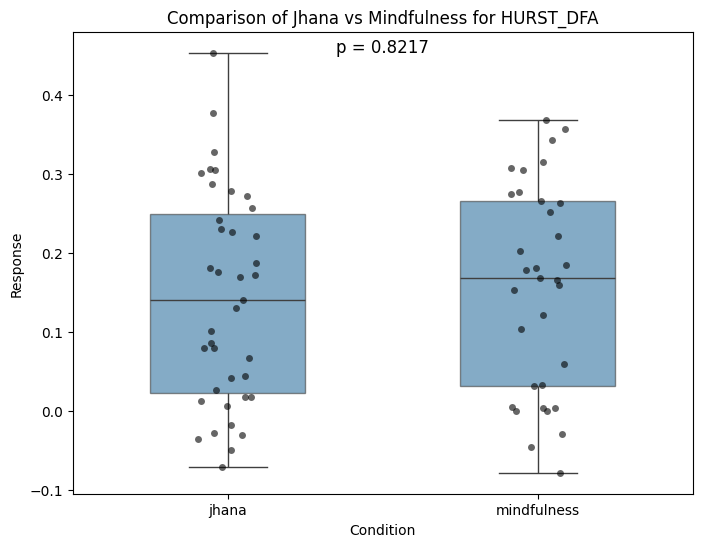

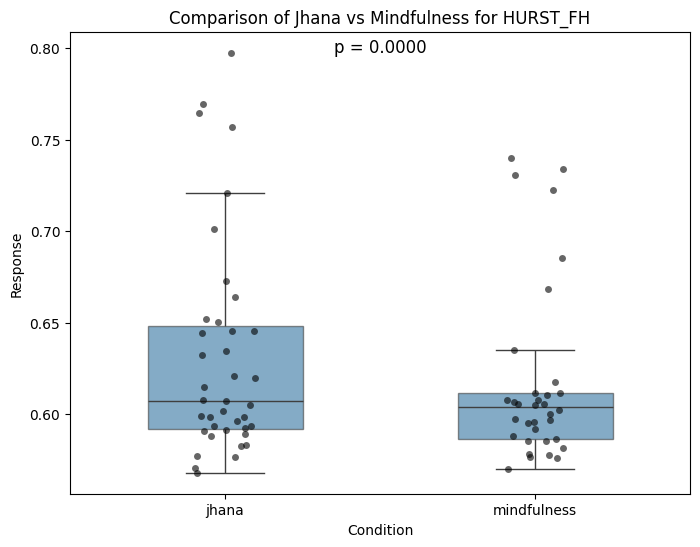

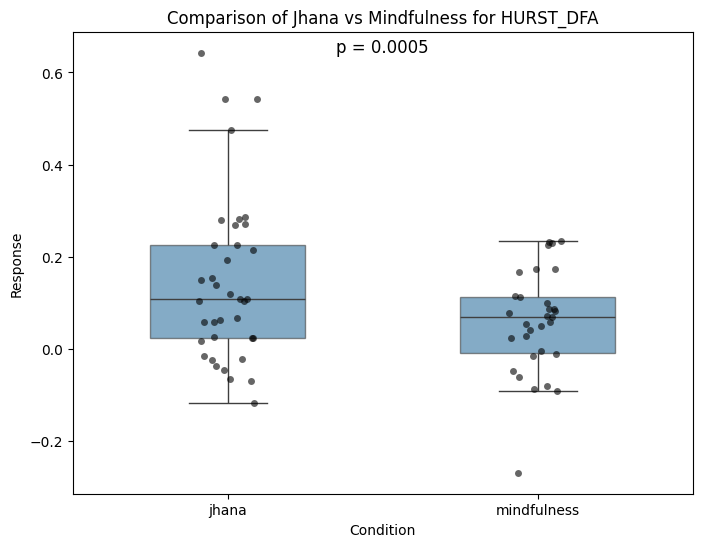

In [70]:
## Avalanches
for dfa in ['DFA_1_4', 'DFA_1_45', 'DFA_4_8', 'DFA_8_13', 'DFA_13_30', 'DFA_30_44']:
    path = f'../output/DFA/{dfa}.csv'
    df = pd.read_csv(path)

    p_val_filtered = analyze_condition_effect(
        df, 
        column_name='all', 
        exclude_combinations=exclusions, 
        plot_base_name=dfa
    )

/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOC_K_median_K_median.png


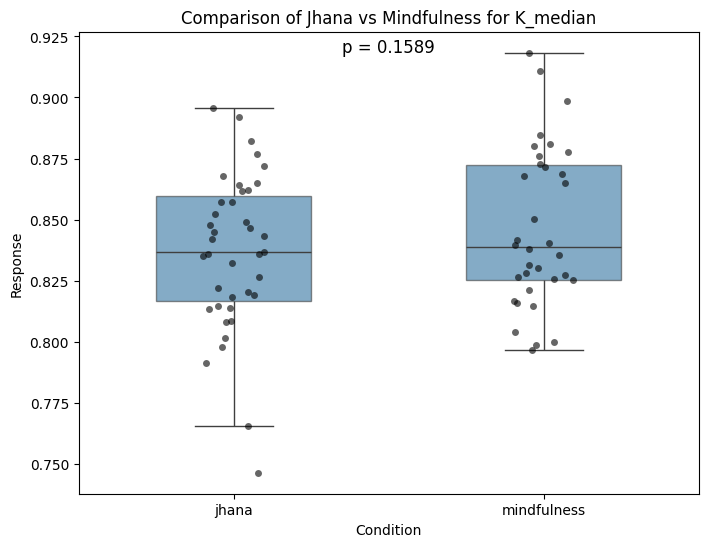

In [62]:
## Avalanches

path = f'../output/EOC/01Chaos_fixed_4.csv'
df = pd.read_csv(path)

p_val_filtered = analyze_condition_effect(
    df, 
    column_name='K_median', 
    exclude_combinations=exclusions, 
    plot_base_name='EOC_K_median'
)

/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_55470/1859484725.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average'] = df[numeric_columns].mean(axis=1)
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/l

Plot saved as: plots/EOC_space_average.png


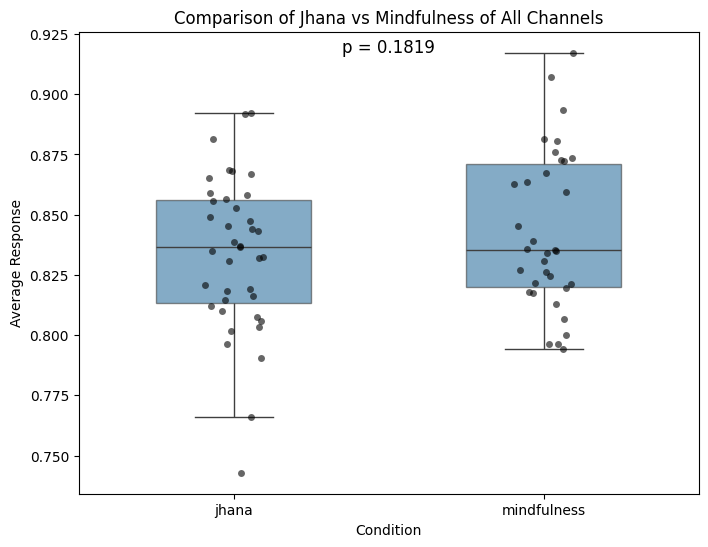

In [63]:
## Avalanches

path = f'../output/EOC/K_space_fixed_4.csv'
df = pd.read_csv(path)

p_val_filtered = analyze_condition_effect(
    df, 
    column_name=None, 
    exclude_combinations=exclusions, 
    plot_base_name='EOC_space'
)

/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_1_4_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_1_4_OR_mean.png
Plot saved as: plots/EOS_1_45_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_1_45_OR_mean.png
Plot saved as: plots/EOS_4_8_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_4_8_OR_mean.png
Plot saved as: plots/EOS_8_13_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_8_13_OR_mean.png
Plot saved as: plots/EOS_13_30_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_13_30_OR_mean.png
Plot saved as: plots/EOS_30_45_PCF_mean.png


/Users/jonasmago/PhD_code_data/github/Criticality_PCI_Anesthesia/venv/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Plot saved as: plots/EOS_30_45_OR_mean.png


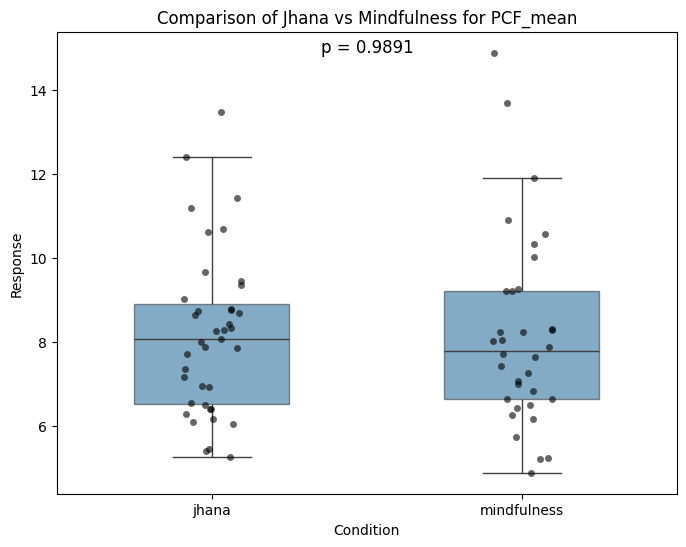

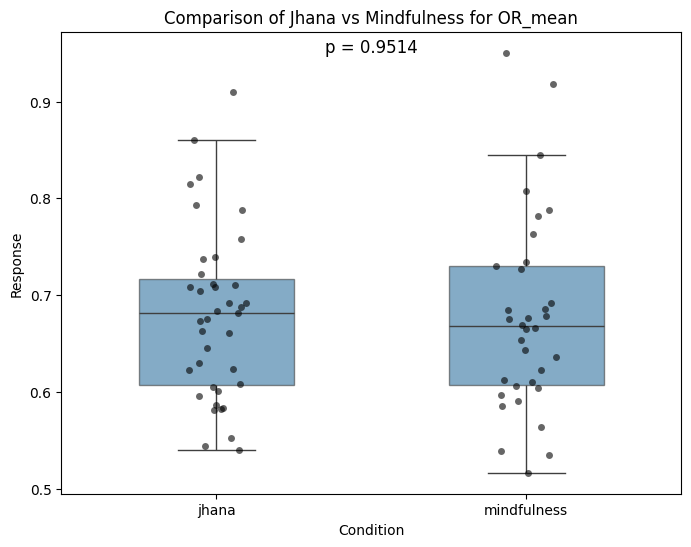

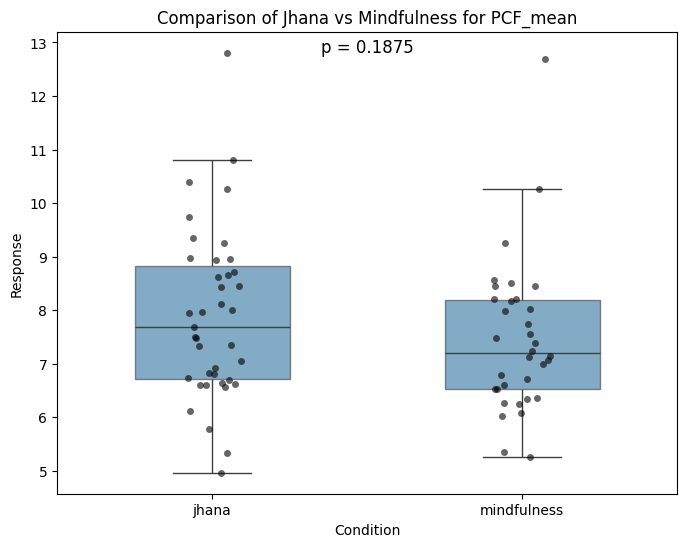

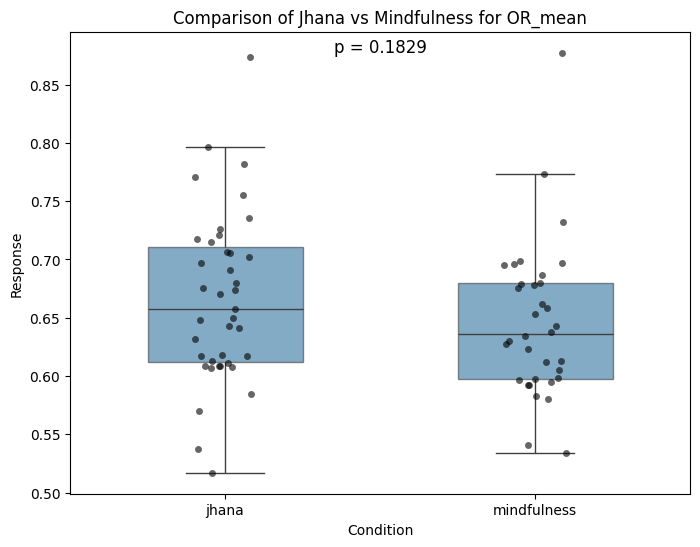

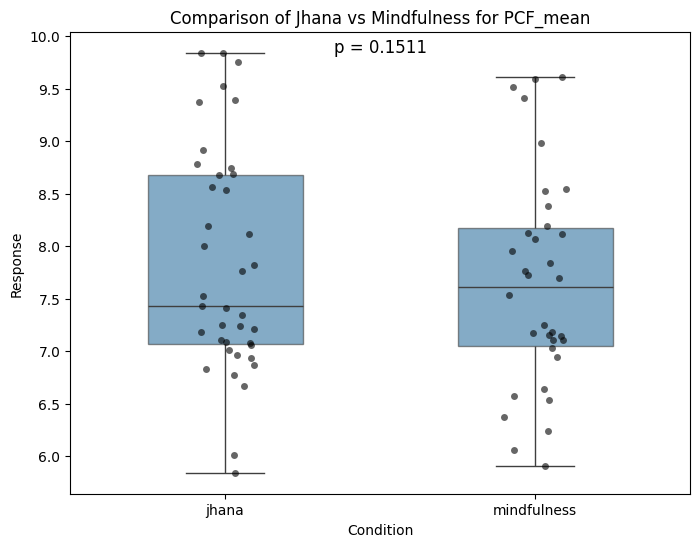

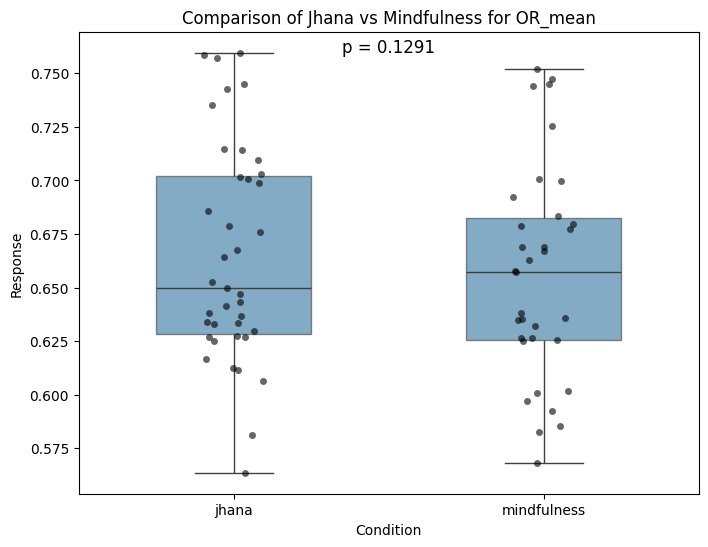

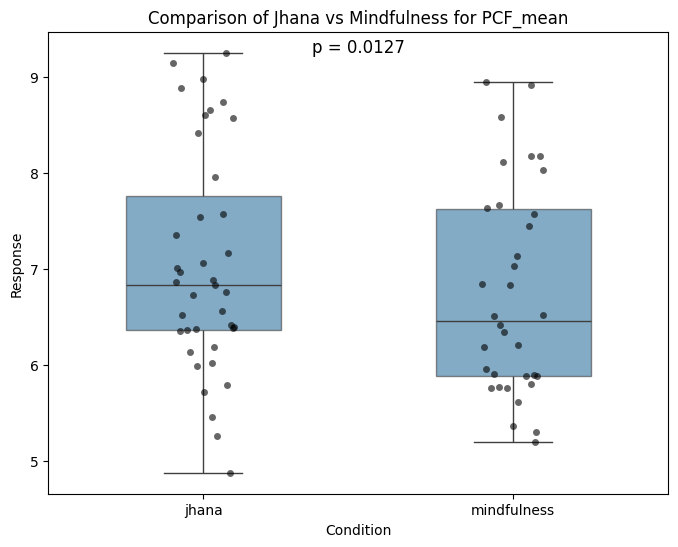

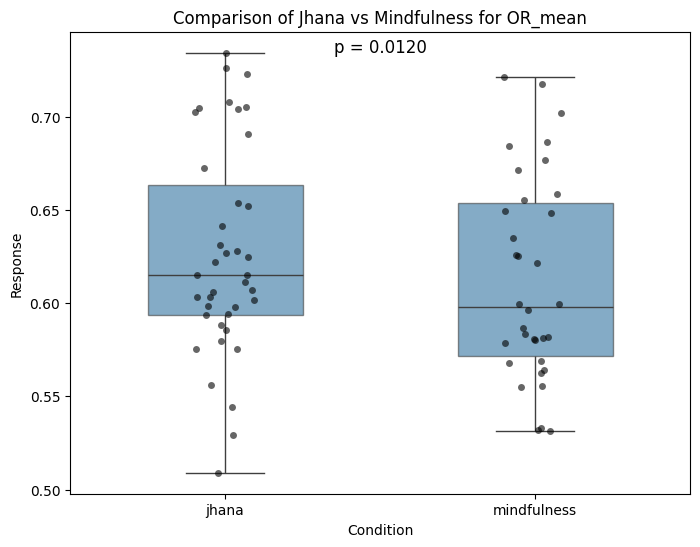

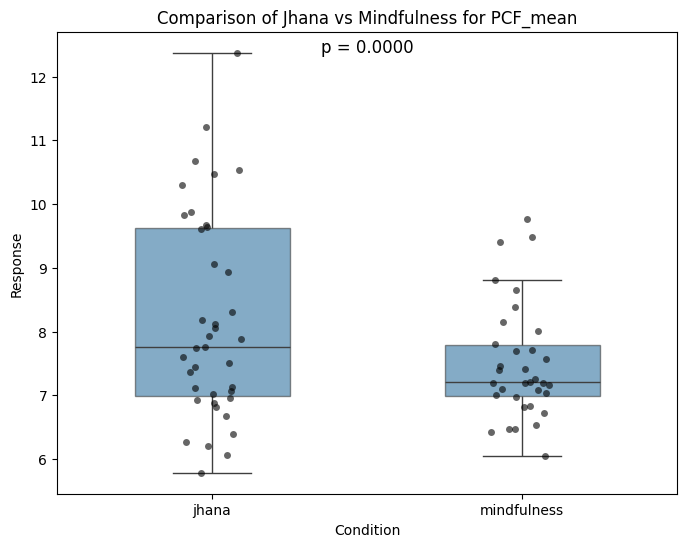

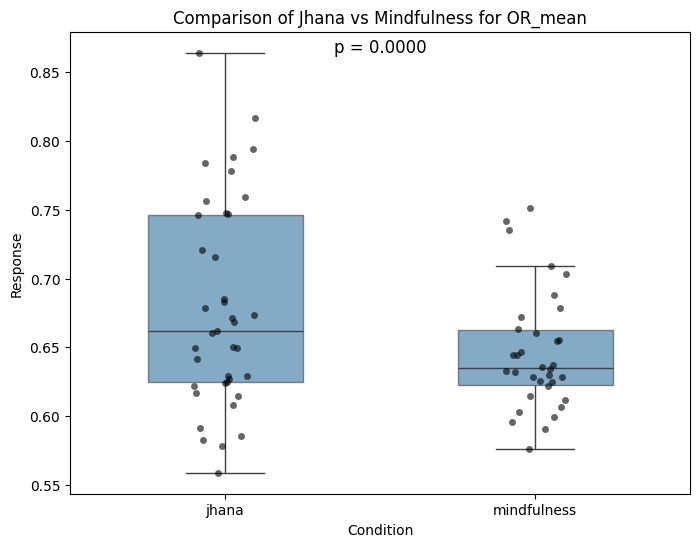

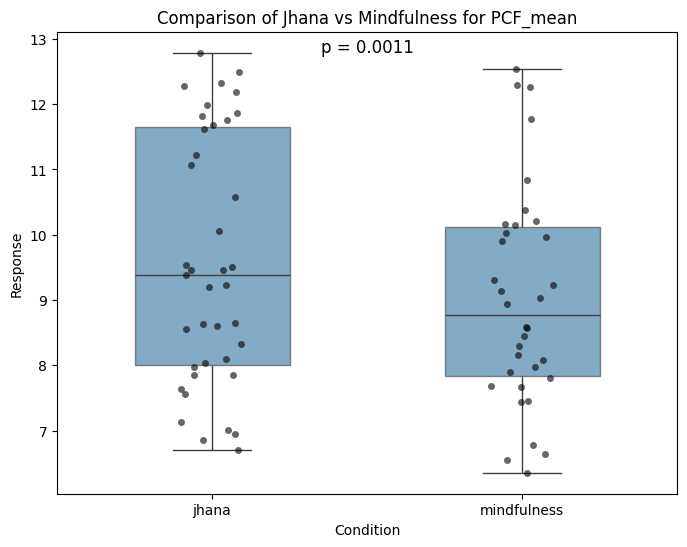

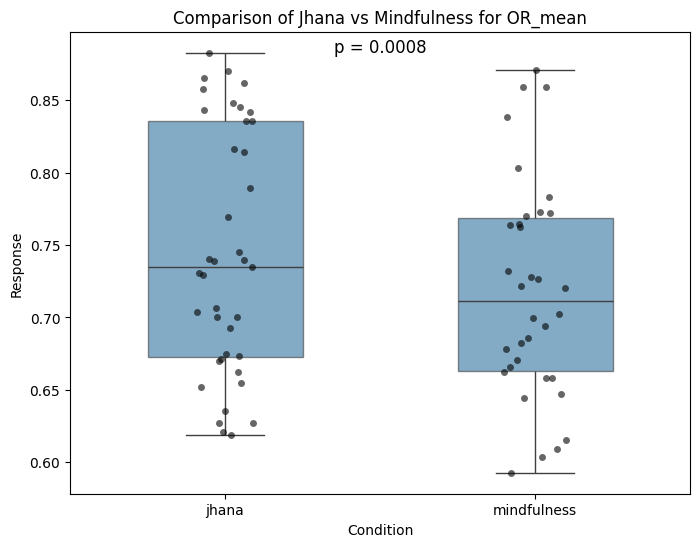

In [69]:
for eos in ['EOS_1_4', 'EOS_1_45', 'EOS_4_8', 'EOS_8_13', 'EOS_13_30', 'EOS_30_45']:
    path = f'../output/EOS/{eos}.csv'
    df = pd.read_csv(path)

    p_val_filtered = analyze_condition_effect(
        df, 
        column_name='all', 
        exclude_combinations=exclusions, 
        plot_base_name=eos
    )

    

Plot saved as: plots/Slope_slope_Slope.png


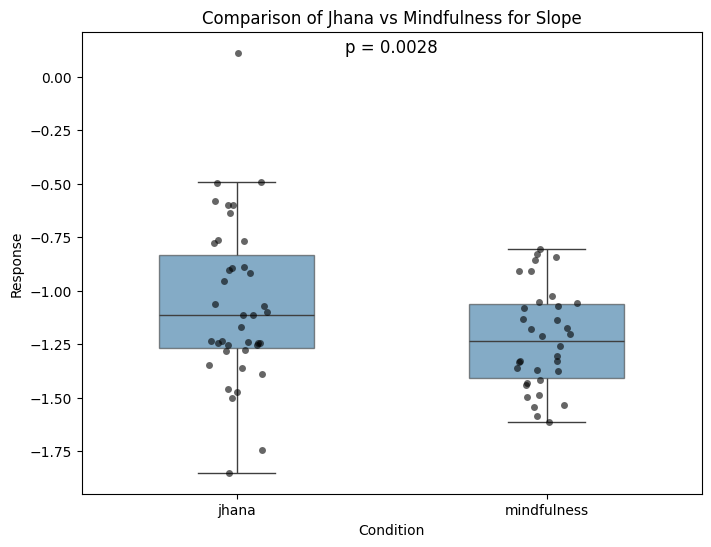

In [71]:
path = f'../output/Slope/Slope.csv'
df = pd.read_csv(path)

p_val_filtered = analyze_condition_effect(
    df, 
    column_name='Slope', 
    exclude_combinations=exclusions, 
    plot_base_name='Slope_slope'
)

/var/folders/bq/hl737msd54q59fzf7spf0r7h0000gn/T/ipykernel_55470/1859484725.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average'] = df[numeric_columns].mean(axis=1)


Plot saved as: plots/Slope_slope_average.png


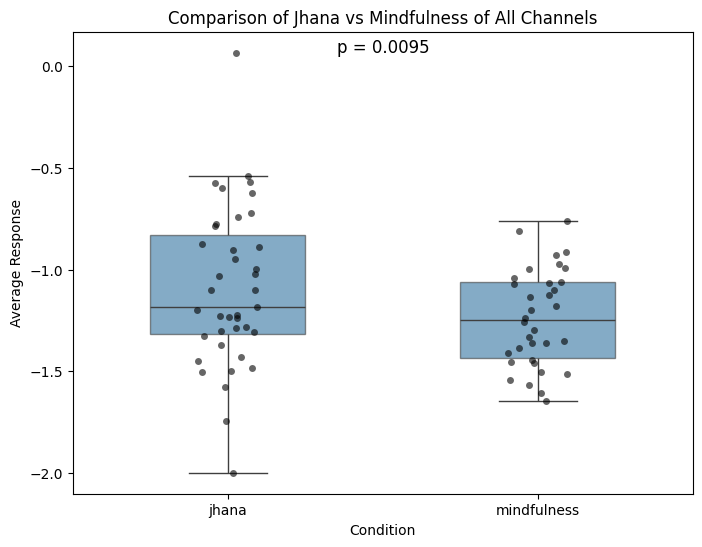

In [72]:
path = f'../output/Slope/Slope_space.csv'
df = pd.read_csv(path)

p_val_filtered = analyze_condition_effect(
    df, 
    column_name=None, 
    exclude_combinations=exclusions, 
    plot_base_name='Slope_slope'
)